### Towards to Interpretable Hemodynamic Fluctuation in Photoplethysmography  
- **Interpretability of Healthcare Neural Network**
- **Personalized Model for Detection Blood Pressure Fluctuation**
- **Simluation-Model-Driven Hemodynamic States Fluctuation**

In [1]:
import os

# Navigate to correct directory
print(os.getcwd())
if os.getcwd().endswith("notebooks"):
    os.chdir("../")
print(os.getcwd())

# Setup auto reload of source code changes
%load_ext autoreload
%autoreload 2

/home/danielwang_echo/Workspace/IHemoMIL/notebooks
/home/danielwang_echo/Workspace/IHemoMIL


In [46]:
from ihemomil.utils import BACKBONE_ZOO, POOLING_METHODS

data_path = 'data'
checkpoint = 'checkpoint-dalia'

dataset = 'bpf'   # dataset

backbone_model = 'inceptiontime'
pooling_method = 'rap'
channels = 1  # signal channel
d_model = 128  # embedding dimension
d_attn = 8 # attention dimension
apply_positional_encoding = True # apply positional encoding

dropout = 0.1 # dropout rate
p_rank = 0.5  # positive rank
p_alpha = 0.5  # positive alpha

use_gpu = True  # use gpu
gpu_id = 1  # gpu id

In [6]:
import torch
import logging 
from ihemomil.utils import set_logger

logger = logging.getLogger("IHEMOMIL.Evaluation-Visualization")

data_dir = os.path.join(data_path, dataset)
model_name = backbone_model + "_" + pooling_method
checkpoint_dir = os.path.join(checkpoint, dataset, model_name)

set_logger(os.path.join(checkpoint_dir, "train.log"))
logger.info("IHEMOMIL: toward to Interpretable HEMOdynamic fluctuation in photoplethysmograph")

if torch.cuda.is_available() and use_gpu:
    device = torch.device("cuda:{}".format(gpu_id))
    logger.info("Using GPU: {}".format(torch.cuda.get_device_name(device)))
else:
    device = torch.device("cpu")
    logger.info("Using CPU...")

[16:12:15] IHEMOMIL.Evaluation-Visualization: IHEMOMIL: toward to Interpretable HEMOdynamic fluctuation in photoplethysmograph
[16:12:15] IHEMOMIL.Evaluation-Visualization: IHEMOMIL: toward to Interpretable HEMOdynamic fluctuation in photoplethysmograph
[16:12:15] IHEMOMIL.Evaluation-Visualization: Using GPU: NVIDIA A100 80GB PCIe
[16:12:15] IHEMOMIL.Evaluation-Visualization: Using GPU: NVIDIA A100 80GB PCIe


In [47]:
from ihemomil.utils import data_selecter
train_dataset, test_dataset = data_selecter(dataset)
n_classes = train_dataset.n_clz

[19:25:48] IHEMOMIL.Utils: Dataset: bpf
[19:25:48] IHEMOMIL.Utils: Dataset: bpf
[19:25:48] IHEMOMIL.Utils: Train dataset size: 9972
[19:25:48] IHEMOMIL.Utils: Train dataset size: 9972
[19:25:48] IHEMOMIL.Utils: Test dataset size: 2496
[19:25:48] IHEMOMIL.Utils: Test dataset size: 2496
[19:25:48] IHEMOMIL.Utils: Number of classes: 3
[19:25:48] IHEMOMIL.Utils: Number of classes: 3


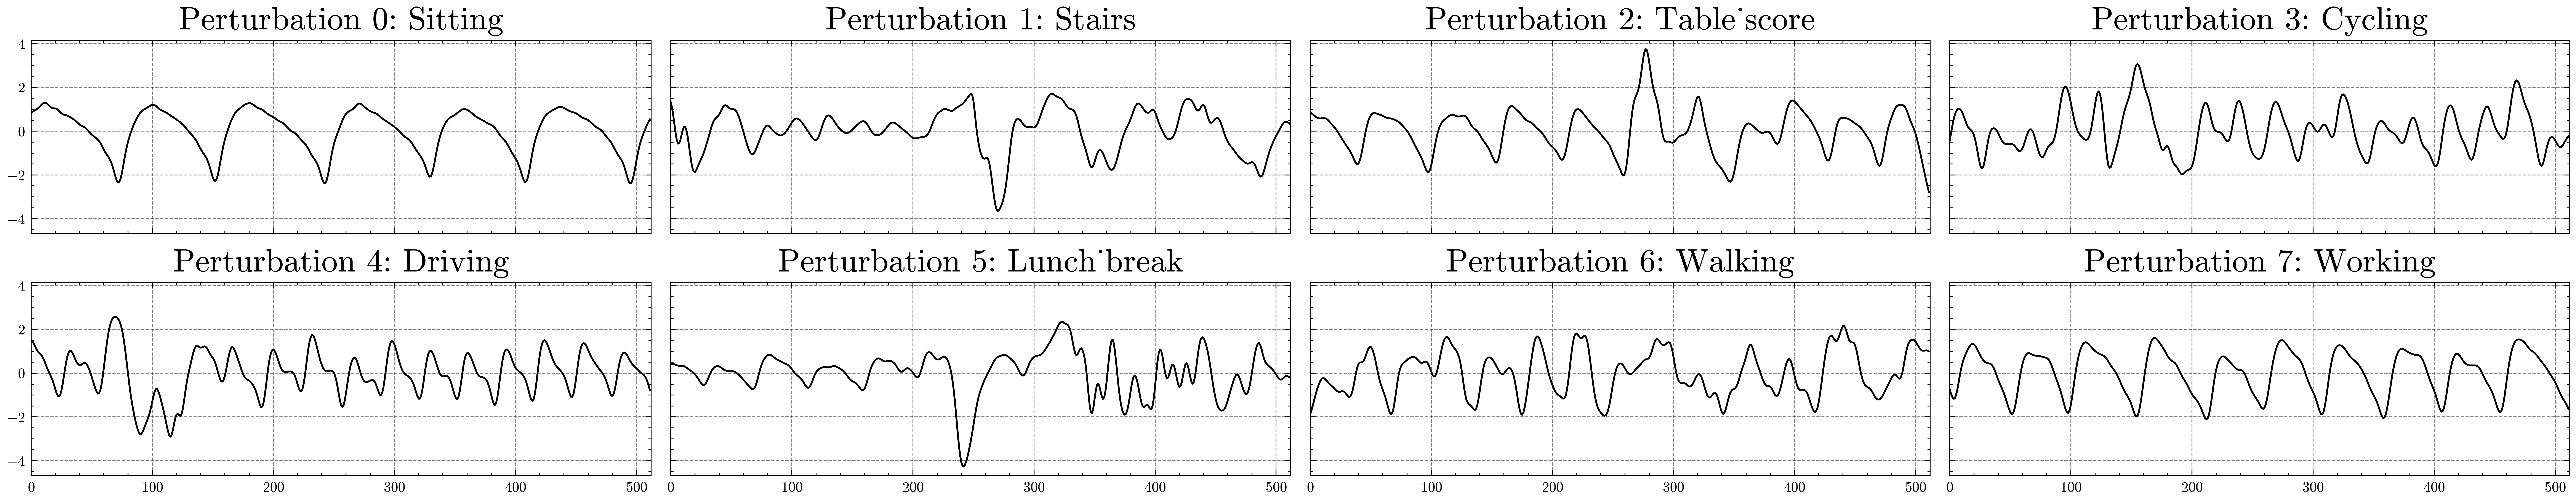

In [9]:
from ihemomil.data.dalia_ppg_dataset import DaLiADATASET, ACTIVITY_CLZ_NAMES
from matplotlib import pyplot as plt
import scienceplots

# Configure matplotlib style
plt.style.use(["science", "ieee", "no-latex", "grid"])

def plot_visualization_examples(dataset: DaLiADATASET):
    _, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 4), sharex=True, sharey=True)
    for clz in range(dataset.n_clz):
        idx_clz = dataset.get_n_idxs(1, clz=clz, shuffle=True)
        ts = dataset.get_bag(idx_clz)
        # Plot time series
        axis = axes[clz // 4, clz % 4]
        axis.plot(ts)
        axis.set_xlim(0, len(ts))
        axis.set_title("Perturbation {:d}: {:s}".format(clz, ACTIVITY_CLZ_NAMES[clz].capitalize()), fontsize=18)

plot_visualization_examples(train_dataset)
plt.tight_layout()

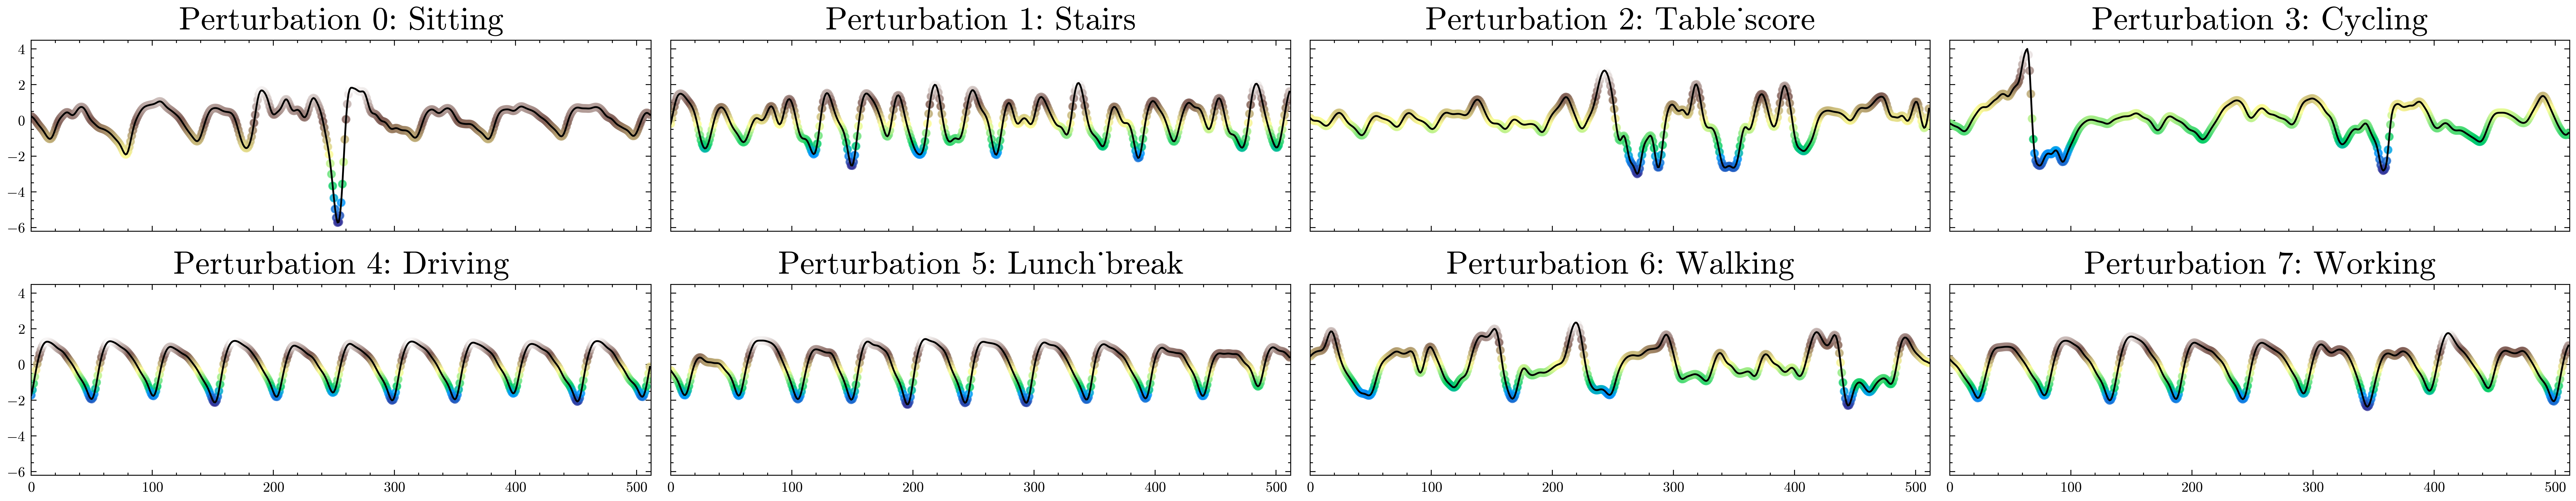

In [30]:
from ihemomil.data.dalia_ppg_dataset import DaLiADATASET, ACTIVITY_CLZ_NAMES
from matplotlib import pyplot as plt
import scienceplots

# Configure matplotlib style
plt.style.use(["science", "ieee", "no-latex", "grid"])

def plot_visualization_examples(dataset: DaLiADATASET):
    _, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 4), sharex=True, sharey=True)
    for clz in range(dataset.n_clz):
        idx_clz = dataset.get_n_idxs(1, clz=clz, shuffle=True)
        ts = dataset.get_bag(idx_clz)
        # Plot time series
        axis = axes[clz // 4, clz % 4]
        axis.plot(ts)
        axis.scatter(range(len(ts)), ts, c=ts,  marker='o', cmap='terrain', alpha=0.75, s=15)
        axis.set_xlim(0, len(ts))
        axis.set_title("Perturbation {:d}: {:s}".format(clz, ACTIVITY_CLZ_NAMES[clz].capitalize()), fontsize=18)
        axis.grid(False)

plot_visualization_examples(train_dataset)
plt.tight_layout()
plt.savefig(os.path.join("visualization_example.png"), dpi=600, bbox_inches='tight', transparent=True)

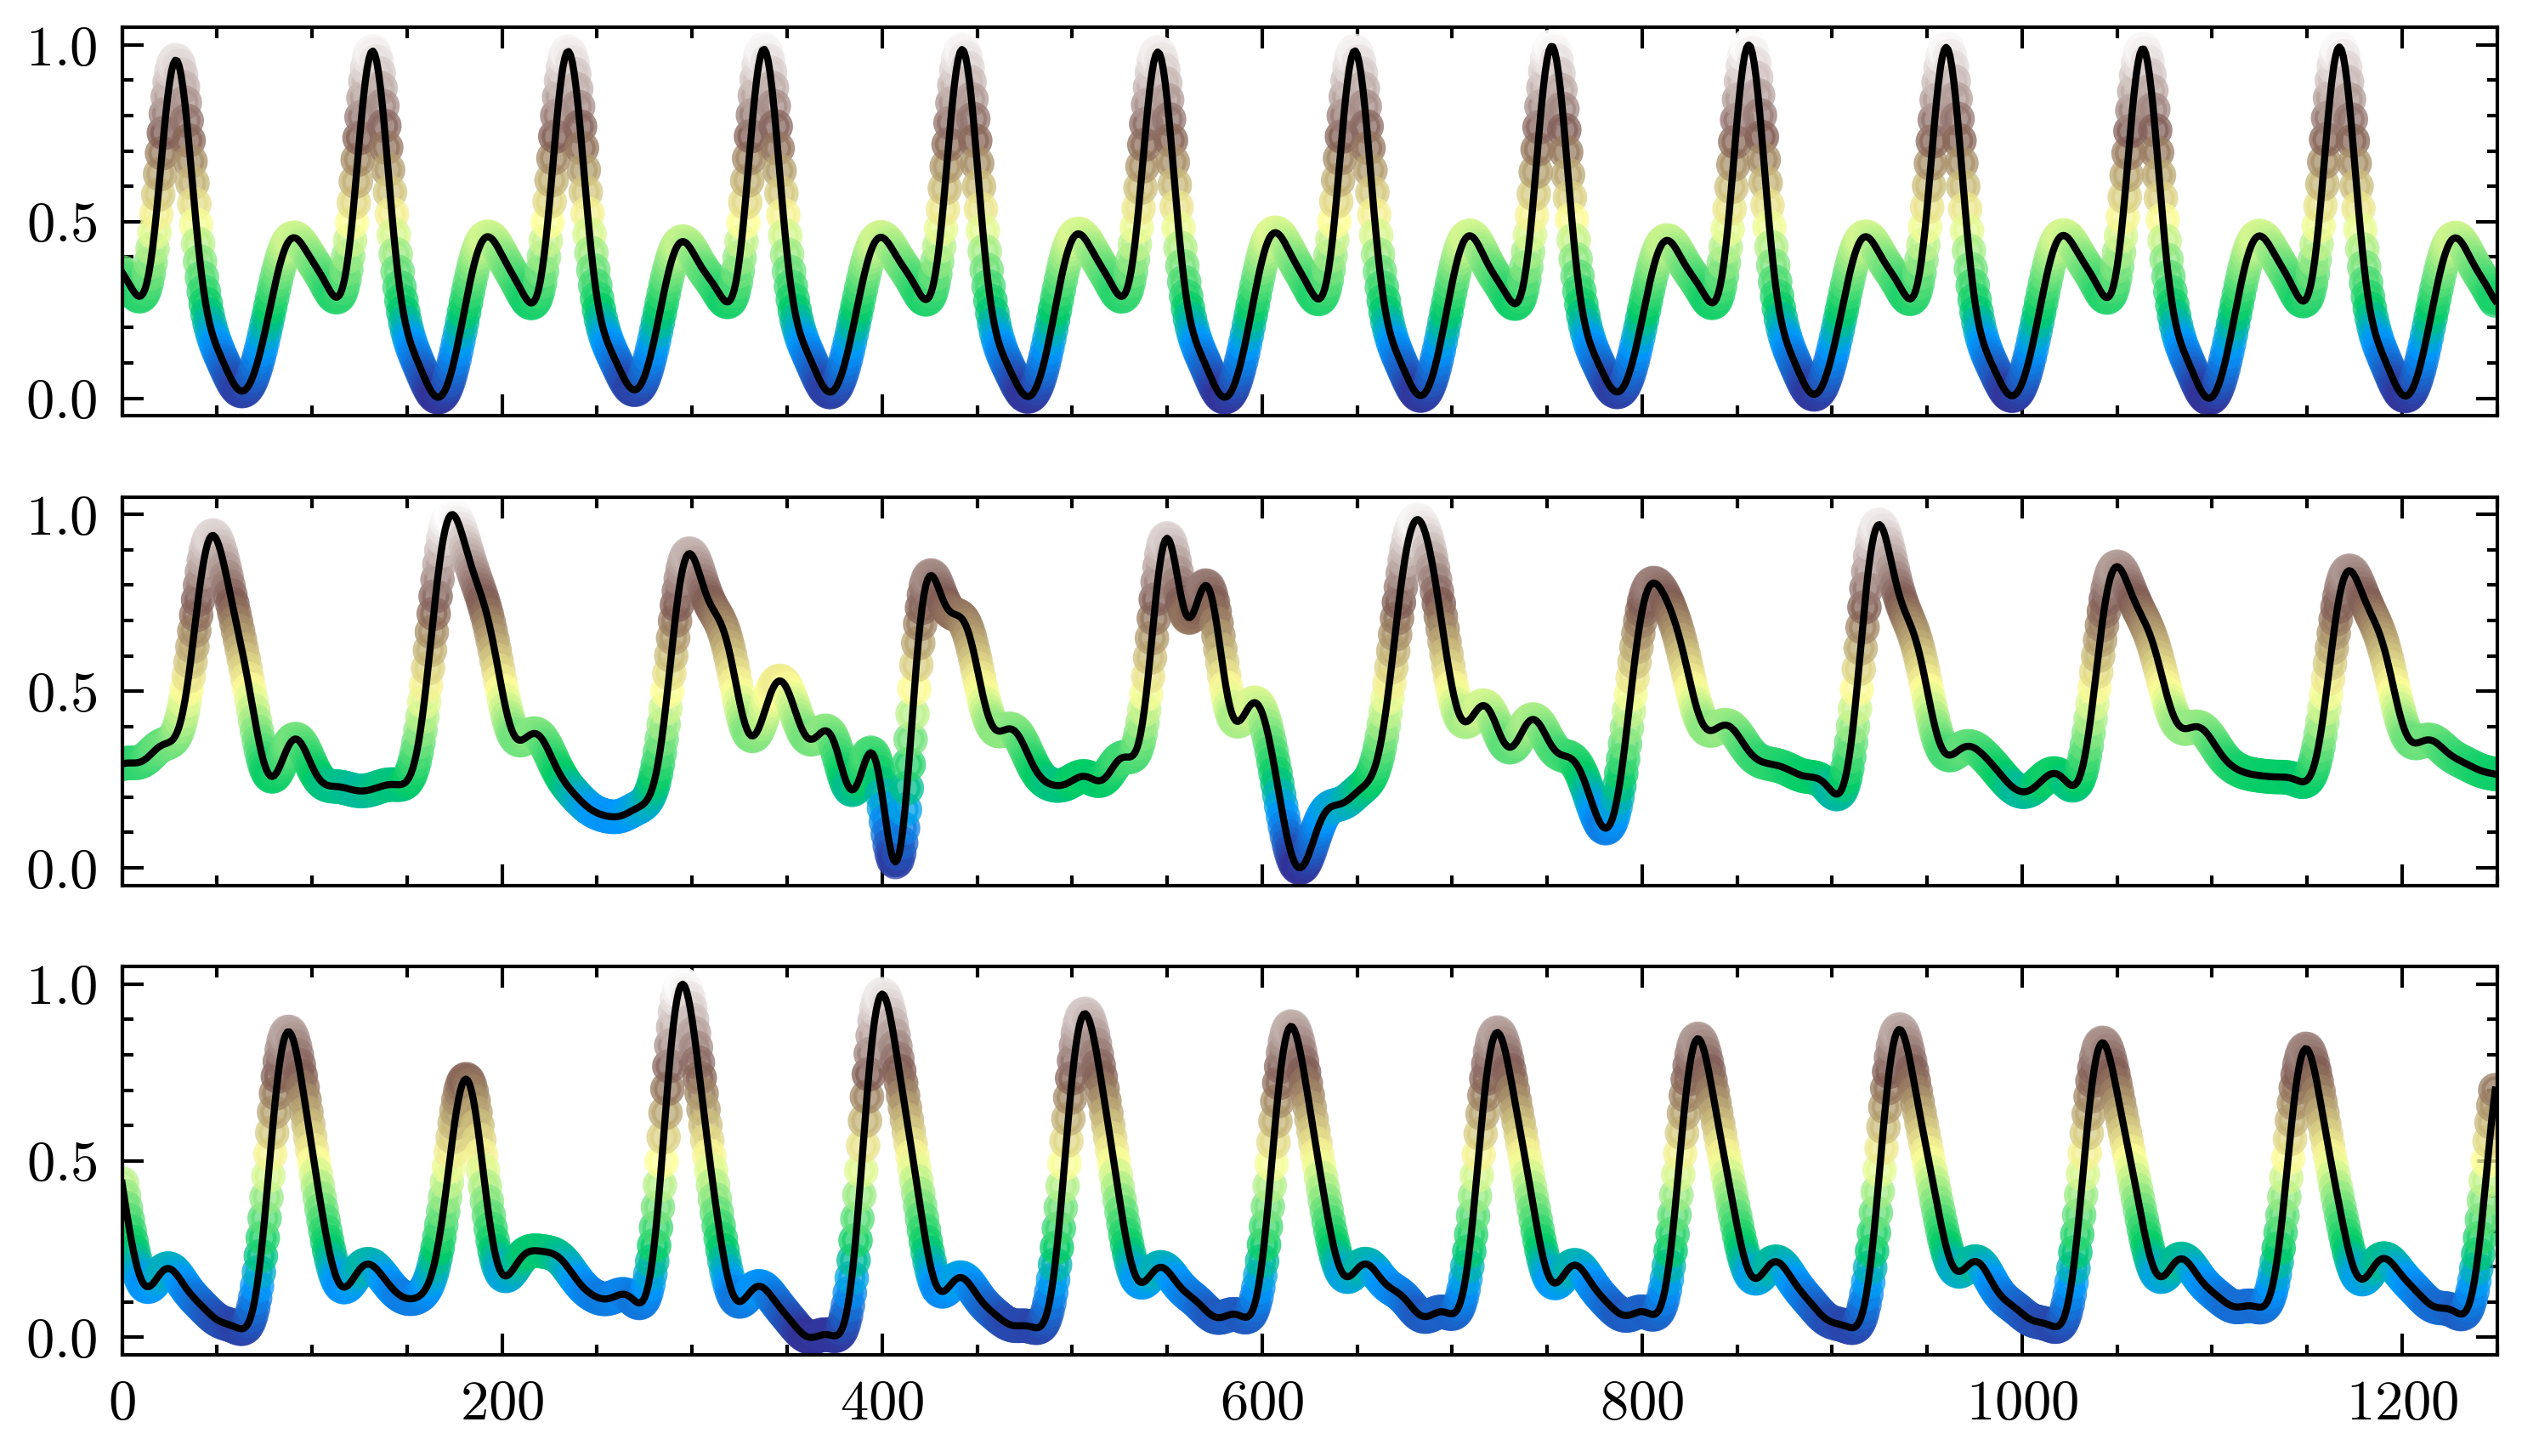

In [66]:
from ihemomil.data.pulsedb_ppg_dataset import PulseDBPPGDataset, PulseDBBPF_CLZ_NAMES
from matplotlib import pyplot as plt
import scienceplots

# Configure matplotlib style
plt.style.use(["science", "ieee", "no-latex", "grid"])

def plot_visualization_examples(dataset: PulseDBPPGDataset):
    _, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 3), sharex=True, sharey=True)
    for clz in range(dataset.n_clz):
        idx_clz = dataset.get_n_idxs(1, clz=clz, shuffle=True)
        ts = dataset.get_bag(idx_clz)
        # Plot time series
        axis = axes[clz]
        axis.plot(ts)
        axis.scatter(range(len(ts)), ts, c=ts,  marker='o', cmap='terrain', alpha=0.75, s=15)
        axis.set_xlim(0, len(ts))
        #axis.set_title("Perturbation {:d}: {:s}".format(clz, PulseDBBPF_CLZ_NAMES[clz].capitalize()), fontsize=18)
        axis.grid(False)

plot_visualization_examples(train_dataset)
plt.tight_layout()
plt.savefig(os.path.join("visualization_example-3.png"), dpi=600, bbox_inches='tight', transparent=True)

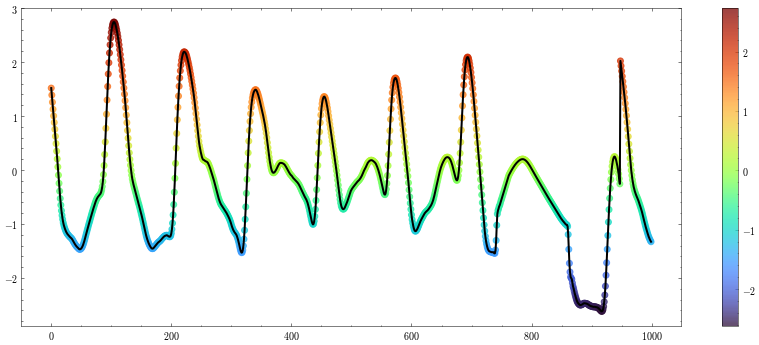

In [7]:
import numpy as np
time = np.arange(0, 1000, 1)
sample = np.load("notebooks/data.npy")
def plot_visualization_examples(sample):
    plt.figure(figsize=(12, 5))
    plt.plot(sample, linewidth=2, color='black')
    plt.scatter(time, sample, c=sample, marker='o', cmap='turbo', alpha=0.75)
    plt.colorbar()
    plt.grid(False)

plot_visualization_examples(sample)
plt.tight_layout()
plt.savefig(os.path.join("visualization_example.png"), dpi=600, bbox_inches='tight', transparent=True)


In [8]:

from torch import nn

from ihemomil.model import backbone
from ihemomil.model import pooling
from ihemomil.model.ihemomil_model_cls import IHemoMILModel
from ihemomil.utils import BulidModel, BACKBONE_ZOO, POOLING_METHODS

backbone_arch = BACKBONE_ZOO.get(backbone_model, None)
pooling_med = POOLING_METHODS.get(pooling_method, None)
logger.info("Backbone: {}".format(backbone))
logger.info("Pooling: {}".format(pooling))

if pooling_method == 'gap' or pooling_method == 'rap' or pooling_method == 'ins':
        net = BulidModel(
            backbone_arch(channels),
            pooling_med(d_model, n_classes, dropout, p_rank, apply_positional_encoding))
    
elif pooling_method == 'atte' or pooling_method == 'addi' or pooling_method == 'conj': 
        net = BulidModel(
            backbone_arch(channels),
            pooling_med(d_model, n_classes, d_attn, dropout, apply_positional_encoding))
else:
        net = BulidModel(
            backbone_arch(channels),
            pooling_med(d_model, n_classes, d_attn, dropout, 
                    p_alpha, apply_positional_encoding),
            )
logger.info("d_model: {}, d_dropout: {}, p_alpha: {}".format(d_model, dropout, p_alpha))

ihemomil = IHemoMILModel("BulidModel", device, n_classes, net)

logger.info("trainable parameters: {}".format(ihemomil.num_params()))

[17:54:32] IHEMOMIL.Evaluation-Visualization: Backbone: <module 'ihemomil.model.backbone' from '/home/danielwang_echo/Workspace/IHemoMIL/ihemomil/model/backbone/__init__.py'>
[17:54:32] IHEMOMIL.Evaluation-Visualization: Pooling: <module 'ihemomil.model.pooling' from '/home/danielwang_echo/Workspace/IHemoMIL/ihemomil/model/pooling.py'>
[17:54:32] IHEMOMIL.Evaluation-Visualization: d_model: 128, d_dropout: 0.1, p_alpha: 0.5
[17:54:34] IHEMOMIL.Evaluation-Visualization: trainable parameters: 422408


In [11]:
from ihemomil.utils import results_log

# Load model
logger.info("Loading model...")
load_model_path = os.path.join(checkpoint_dir, "model.pth")
ihemomil.load_weights(load_model_path)

# evaluate model
logger.info("Evaluating model...")

# Evaluate predictive performance on train and test splits
train_results_dict = ihemomil.evaluate(train_dataset)
test_results_dict = ihemomil.evaluate(test_dataset)

# Evaluate interpretability on train and test splits
train_aopcr = ihemomil.evaluate_interpretability(train_dataset)
test_aopcr = ihemomil.evaluate_interpretability(test_dataset)
header = ["Split", "Accuracy", "b-accuracy", "AUROC", "Loss", "AOPCR"]
train_row = ["Train", train_results_dict["acc"], train_results_dict["bal_acc"], train_results_dict["auroc"],
                 train_results_dict["loss"], train_aopcr]
test_row = ["Test", test_results_dict["acc"], test_results_dict["bal_acc"], test_results_dict["auroc"],
                test_results_dict["loss"], test_aopcr]
results_data = [header, train_row, test_row]

# Print results table
results_log(results_data)


[17:58:26] IHEMOMIL.Evaluation-Visualization: Loading model...
[17:58:26] IHEMOMIL.Evaluation-Visualization: Evaluating model...


[17:59:35] IHEMOMIL.Utils:                     
+-------+----------+------------+-------+-------+-------+
| Split | Accuracy | b-accuracy | AUROC | Loss  | AOPCR |
+=======+==========+============+=======+=======+=======+
| Train | 1        | 1          | 1     | 0.001 | 0.695 |
+-------+----------+------------+-------+-------+-------+
| Test  | 0.561    | 0.527      | 0.861 | 2.338 | 0.981 |
+-------+----------+------------+-------+-------+-------+


[16:02:25] IHEMOMIL.Utils: Saved confusion matrix to checkpoint/mp_ppg_TBME/inceptiontime_rap/conf_mat_1.png


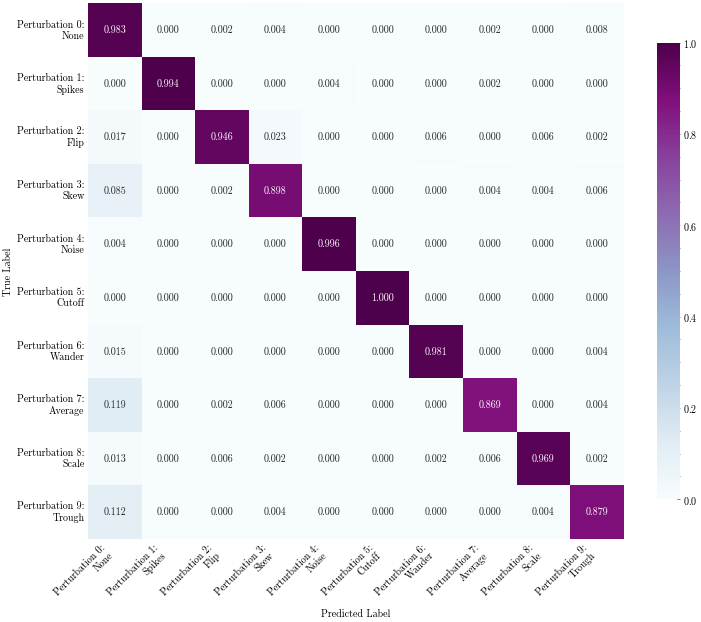

In [8]:
from ihemomil.utils import plot_conf_mat
# Plot confusion matrix
plot_conf_mat(test_results_dict["conf_mat"], checkpoint_dir, dataset, file_name="conf_mat_1")

Found 480 time series for class 3 (Skew)
Found 41 peak time series classified as class 0 (None)


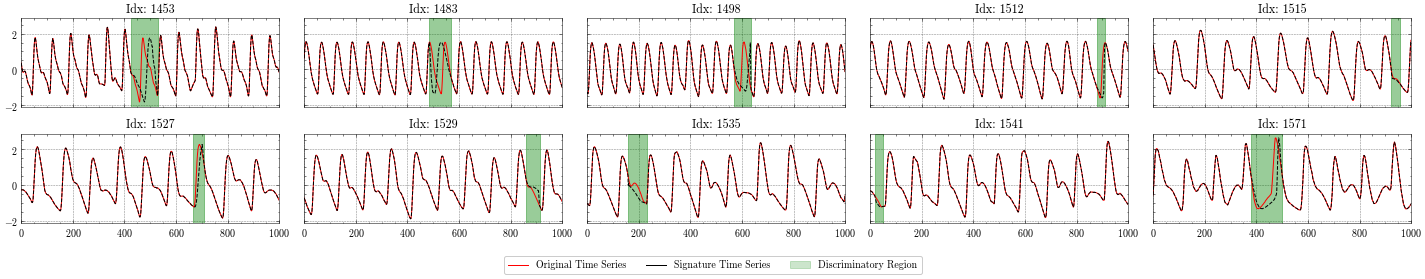

In [9]:
"""
View examples where Average is classified as None
"""
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

colours = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Get all test time series for Observed class
observed_clz = 3
observed_idxs = [idx.item() for idx in test_dataset.get_clz_idxs(observed_clz)]
print("Found {:d} time series for class {:d} ({:s})".format(len(observed_idxs), observed_clz, MORPPERTURPPG_CLZ_NAMES[observed_clz].capitalize()))

observed_as_none_idxs = []
for idx in observed_idxs:
    bag = test_dataset[idx]["bag"]
    model_out = ihemomil(bag)
    bag_logits = model_out["bag_logits"]
    pred_clz = torch.argmax(bag_logits).item()
    if pred_clz == 0:
        observed_as_none_idxs.append(idx)

print("Found {:d} peak time series classified as class 0 (None)".format(len(observed_as_none_idxs)))


def plot_misclassified_time_series():
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 4), sharex=True, sharey=True)
    # Plot each "peak as none" example
    for i, idx in enumerate(observed_as_none_idxs[:10]):
        # Get original and signature time series
        orig_ts = test_dataset.get_bag(idx-observed_clz*len(observed_idxs))
        sig_ts = test_dataset.get_bag(idx)
        # Plot time series
        axis = axes[i // 5, i % 5]
        axis.plot(orig_ts, color=colours[1])
        axis.plot(sig_ts, color="k")
        # Plot signature location
        signature_locations = test_dataset.get_signature_locations(idx)
        axis.axvspan(*signature_locations[0], alpha=0.4, color=colours[3])
        # Configure axis
        axis.set_xlim(0, len(sig_ts))
        axis.set_title("Idx: {:d}".format(idx))
    # Custom legend
    handles = [
        Line2D([0], [0], color=colours[1]),
        Line2D([0], [0], color="k"),
        Patch(edgecolor=colours[3], facecolor=colours[3], fill=True, alpha=0.2),
    ]
    fig.legend(
        handles=handles,
        labels=[
            "Original Time Series",
            "Signature Time Series",
            "Discriminatory Region",
        ],
        loc="lower center",
        ncol=3,
    )

plot_misclassified_time_series()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

In [10]:
colours = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colours

['k', 'r', 'b', 'g']

-- Idx: 1455 --
Class 0 (None): 0.000
Class 3 (Skew): 1.000
-- Idx: 1453 --
Class 0 (None): 0.965
Class 3 (Skew): 0.030
-- Idx: 1571 --
Class 0 (None): 0.948
Class 3 (Skew): 0.049


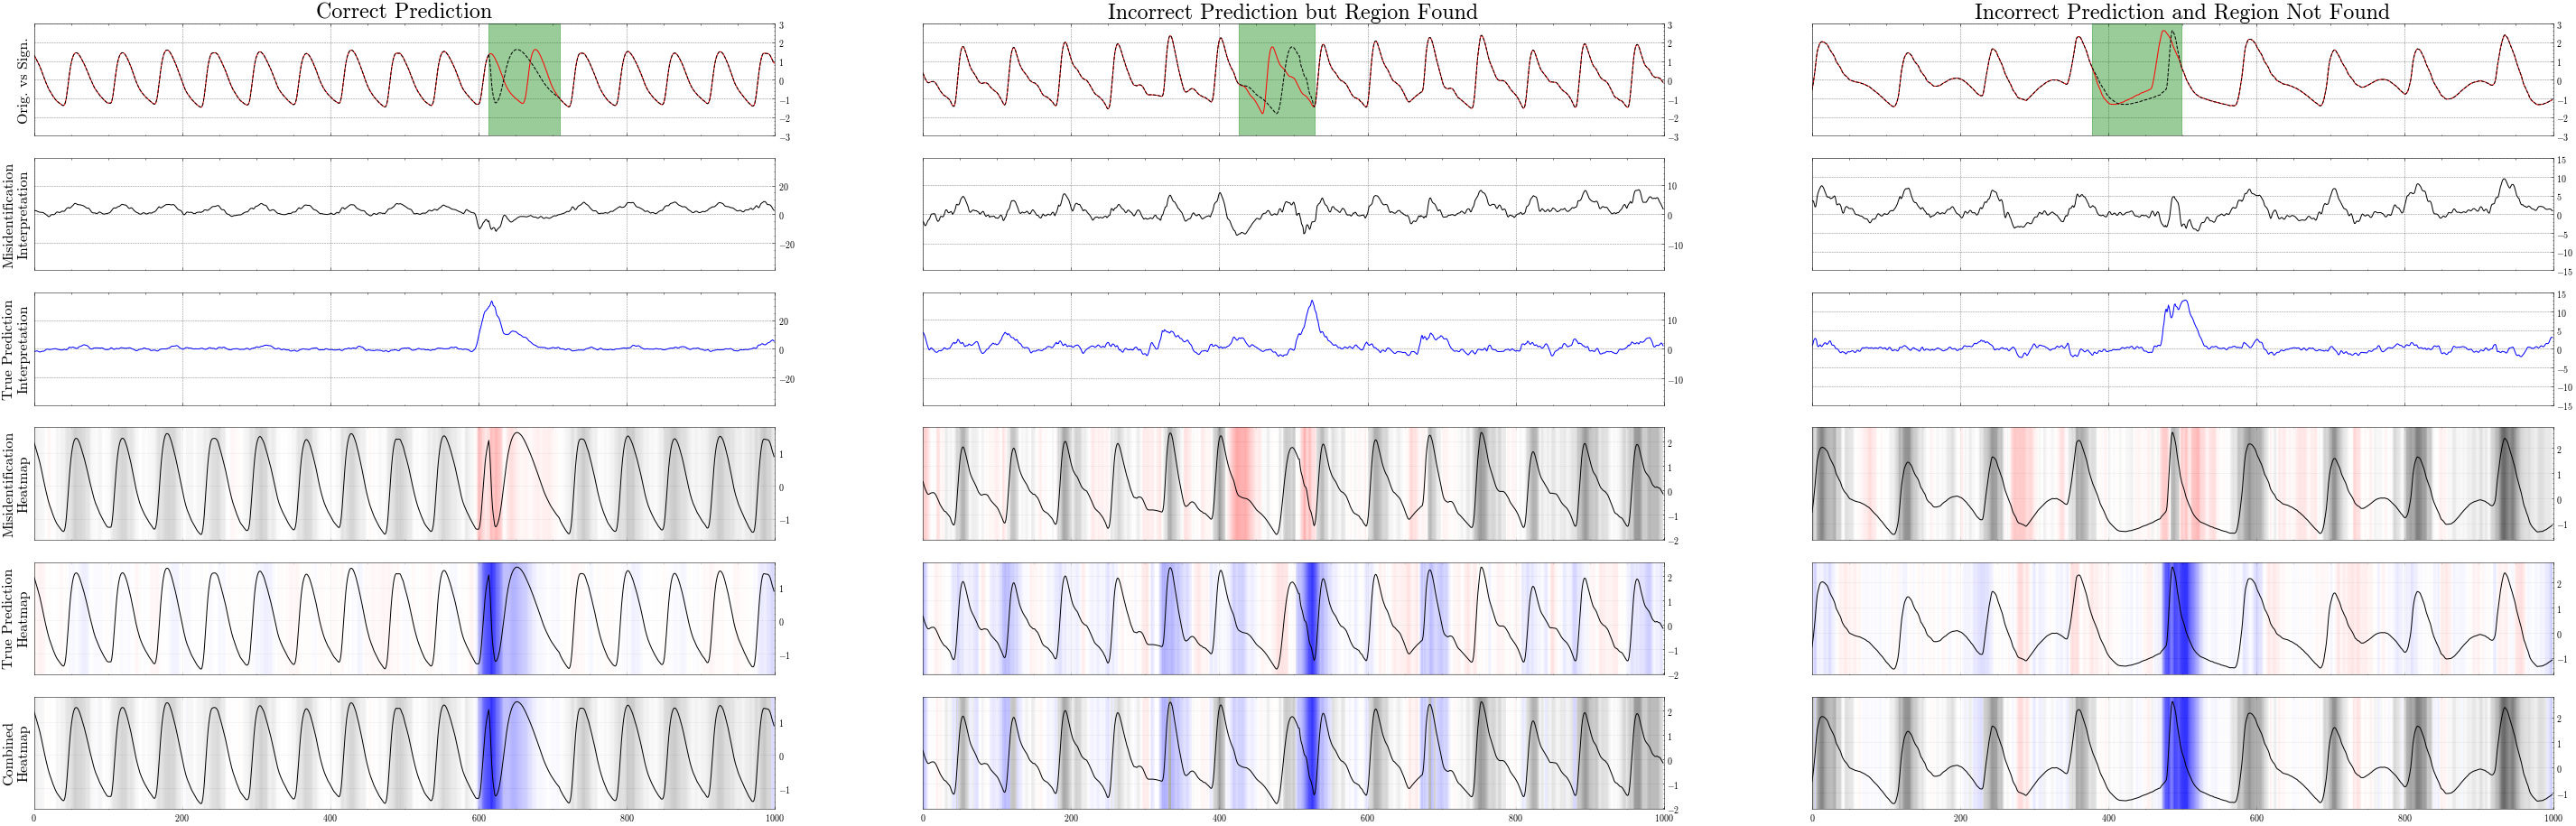

In [11]:
"""
Interpretability study for specific idxs
"""
import matplotlib as mpl


def plot_interpretation_comparison():
    idxs = [1455, 1453, 1571]

    fig, axes = plt.subplots(nrows=6, ncols=3, sharex=True, figsize=(50, 16))

    for i, idx in enumerate(idxs):
        bag = test_dataset[idx]["bag"]
        model_out = ihemomil(bag)
        bag_logits = model_out["bag_logits"]
        bag_probas = torch.softmax(bag_logits, dim=0)
        print("-- Idx: {:d} --".format(idx))
        for c in [0, observed_clz]:
            print("Class {:d} ({:s}): {:.3f}".format(c, MORPPERTURPPG_CLZ_NAMES[c].capitalize(), bag_probas[c]))
        clz_interpretations = ihemomil.interpret(model_out).detach().cpu()
        none_interpretation = clz_interpretations[0]
        average_interpretation = clz_interpretations[observed_clz]

        lim = max(max(abs(none_interpretation)), max(abs(average_interpretation)))

        orig_ts = test_dataset.get_bag(idx-observed_clz*len(observed_idxs))
        sig_ts = test_dataset.get_bag(idx)
        # Plot time series
        axes[0, i].plot(orig_ts, color=colours[1])
        axes[0, i].plot(sig_ts, color="k")
        # Plot signature location
        signature_locations = test_dataset.get_signature_locations(idx)
        axes[0, i].axvspan(*signature_locations[0], alpha=0.4, color=colours[3])
        # Configure axis
        axes[0, i].set_xlim(0, len(sig_ts))
        axes[0, i].set_ylim(-3, 3)
        # Plot interpretations
        axes[1, i].plot(none_interpretation, color=colours[0])
        axes[2, i].plot(average_interpretation, color=colours[2])

        axes[1, i].set_ylim(-int(lim * 1.2), int(lim * 1.2))
        axes[2, i].set_ylim(-int(lim * 1.2), int(lim * 1.2))

        norm = plt.Normalize(-lim, lim)
        axes[3, i].plot(sig_ts, color="k")
        plot_single_bg_heatmap(axes[3, i], none_interpretation, get_cmap(colours[0]), norm)

        axes[4, i].plot(sig_ts, color="k")
        plot_single_bg_heatmap(axes[4, i], average_interpretation, get_cmap(colours[2]), norm)

        axes[5, i].plot(sig_ts, color="k")
        plot_max_bg_heatmap(
            axes[5, i],
            torch.stack([none_interpretation, average_interpretation]),
            [get_cmap(colours[0]), get_cmap(colours[2])],
            norm,
        )

        for axis in axes[:, i]:
            axis.yaxis.tick_right()


    axes[0, 0].set_title("Correct Prediction".format(idxs[0]), size=24)
    axes[0, 1].set_title("Incorrect Prediction but Region Found".format(idxs[1]), size=24)
    axes[0, 2].set_title("Incorrect Prediction and Region Not Found".format(idxs[2]), size=24)

    axes[0, 0].set_ylabel("Orig. vs Sign.", fontsize=16)
    axes[1, 0].set_ylabel("Misidentification\nInterpretation", fontsize=16)
    axes[2, 0].set_ylabel("True Prediction\nInterpretation".format(observed_clz), fontsize=16)
    axes[3, 0].set_ylabel("Misidentification\nHeatmap", fontsize=16)
    axes[4, 0].set_ylabel("True Prediction\nHeatmap".format(observed_clz), fontsize=16)
    axes[5, 0].set_ylabel("Combined\nHeatmap", fontsize=16)
    fig.savefig(os.path.join("interpretation_comparison.png"), dpi=600)


def plot_single_bg_heatmap(axis, values, cmap, norm, xs=None, alpha=0.8):
    if xs is None:
        xs = range(len(values))
    for x, s in zip(xs, values):
        colour = cmap(norm(s))
        axis.axvspan(x - 0.5, x + 0.5, color=colour, alpha=alpha, lw=0)


def plot_max_bg_heatmap(axis, multi_values, multi_cmap, norm, xs=None, alpha=0.8):
    if xs is None:
        xs = range(multi_values.shape[1])
    maxs = torch.argmax(multi_values, dim=0)
    for x in xs:
        m = maxs[x]
        cmap = multi_cmap[m]
        value = multi_values[m][x]
        colour = cmap(norm(value))
        axis.axvspan(x - 0.5, x + 0.5, color=colour, alpha=alpha, lw=0)


def get_cmap(colour):
    return mpl.colors.LinearSegmentedColormap.from_list("", ["red", "white", colour])


plot_interpretation_comparison()


0
-- Idx: 1455 --
Class 0 (None): 0.000
Class 3 (Skew): 1.000
1
-- Idx: 1529 --
Class 0 (None): 0.619
Class 3 (Skew): 0.372
2
-- Idx: 1541 --
Class 0 (None): 1.000
Class 3 (Skew): 0.000


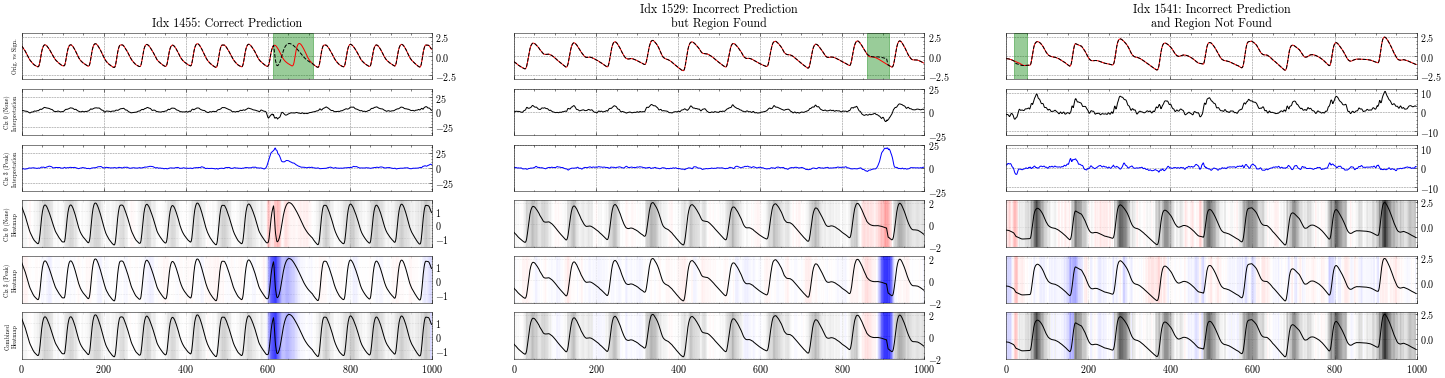

In [12]:
"""
Interpretability study for specific idxs
"""
import matplotlib as mpl


def plot_interpretation_comparison():
    idxs = [1455, 1529, 1541]

    fig, axes = plt.subplots(nrows=6, ncols=3, sharex=True, figsize=(25, 6))

    for i, idx in enumerate(idxs):
        print(i)
        bag = test_dataset[idx]["bag"]
        model_out = ihemomil(bag)
        bag_logits = model_out["bag_logits"]
        bag_probas = torch.softmax(bag_logits, dim=0)
        print("-- Idx: {:d} --".format(idx))
        for c in [0, observed_clz]:
            print("Class {:d} ({:s}): {:.3f}".format(c, MORPPERTURPPG_CLZ_NAMES[c].capitalize(), bag_probas[c]))
        clz_interpretations = ihemomil.interpret(model_out).detach().cpu()
        none_interpretation = clz_interpretations[0]
        average_interpretation = clz_interpretations[observed_clz]

        lim = max(max(abs(none_interpretation)), max(abs(average_interpretation)))

        orig_ts = test_dataset.get_bag(idx-observed_clz*len(observed_idxs))
        sig_ts = test_dataset.get_bag(idx)
        # Plot time series
        axes[0, i].plot(orig_ts, color=colours[1])
        axes[0, i].plot(sig_ts, color="k")
        # Plot signature location
        signature_locations = test_dataset.get_signature_locations(idx)
        axes[0, i].axvspan(*signature_locations[0], alpha=0.4, color=colours[3])
        # Configure axis
        axes[0, i].set_xlim(0, len(sig_ts))
        axes[0, i].set_ylim(-3, 3)
        # Plot interpretations
        axes[1, i].plot(none_interpretation, color=colours[0])
        axes[2, i].plot(average_interpretation, color=colours[2])

        axes[1, i].set_ylim(-int(lim * 1.2), int(lim * 1.2))
        axes[2, i].set_ylim(-int(lim * 1.2), int(lim * 1.2))

        norm = plt.Normalize(-lim, lim)
        axes[3, i].plot(sig_ts, color="k")
        plot_single_bg_heatmap(axes[3, i], none_interpretation, get_cmap(colours[0]), norm)

        axes[4, i].plot(sig_ts, color="k")
        plot_single_bg_heatmap(axes[4, i], average_interpretation, get_cmap(colours[2]), norm)

        axes[5, i].plot(sig_ts, color="k")
        plot_max_bg_heatmap(
            axes[5, i],
            torch.stack([none_interpretation, average_interpretation]),
            [get_cmap(colours[0]), get_cmap(colours[2])],
            norm,
        )

        for axis in axes[:, i]:
            axis.yaxis.tick_right()

    axes[0, 0].set_title("Idx {:d}: Correct Prediction".format(idxs[0]))
    axes[0, 1].set_title("Idx {:d}: Incorrect Prediction\nbut Region Found".format(idxs[1]))
    axes[0, 2].set_title("Idx {:d}: Incorrect Prediction\nand Region Not Found".format(idxs[2]))

    axes[0, 0].set_ylabel("Orig. vs Sign.", fontsize=6)
    axes[1, 0].set_ylabel("Clz 0 (None)\nInterpretation", fontsize=6)
    axes[2, 0].set_ylabel("Clz {:d} (Peak)\nInterpretation".format(observed_clz), fontsize=6)
    axes[3, 0].set_ylabel("Clz 0 (None)\nHeatmap", fontsize=6)
    axes[4, 0].set_ylabel("Clz {:d} (Peak)\nHeatmap".format(observed_clz), fontsize=6)
    axes[5, 0].set_ylabel("Combined\nHeatmap", fontsize=6)
    fig.savefig(os.path.join("interpretation_comparison.png"), dpi=600)


def plot_single_bg_heatmap(axis, values, cmap, norm, xs=None, alpha=0.8):
    if xs is None:
        xs = range(len(values))
    for x, s in zip(xs, values):
        colour = cmap(norm(s))
        axis.axvspan(x - 0.5, x + 0.5, color=colour, alpha=alpha, lw=0)


def plot_max_bg_heatmap(axis, multi_values, multi_cmap, norm, xs=None, alpha=0.8):
    if xs is None:
        xs = range(multi_values.shape[1])
    maxs = torch.argmax(multi_values, dim=0)
    for x in xs:
        m = maxs[x]
        cmap = multi_cmap[m]
        value = multi_values[m][x]
        colour = cmap(norm(value))
        axis.axvspan(x - 0.5, x + 0.5, color=colour, alpha=alpha, lw=0)


def get_cmap(colour):
    return mpl.colors.LinearSegmentedColormap.from_list("", ["red", "white", colour])


plot_interpretation_comparison()

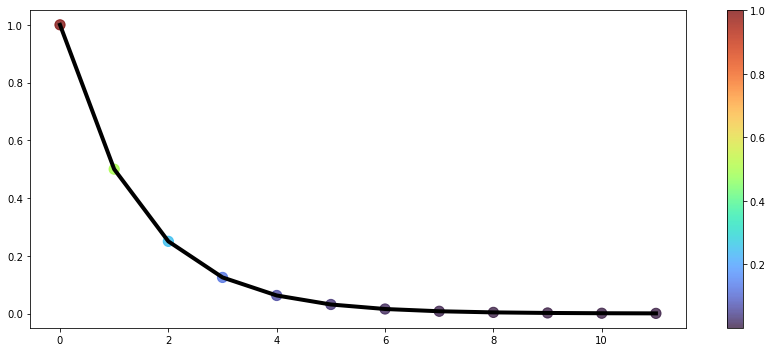

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import os
a = np.arange(0, 12, 1)
s = 0.5*(1-0.5)**(a-1)
plt.figure(figsize=(12, 5))
plt.plot(a, s, linewidth=4, color='black')
plt.scatter(a, s, c=s, marker='o', cmap='turbo', alpha=0.75, s=105)
plt.colorbar()
plt.grid(False)
plt.tight_layout()
plt.savefig(os.path.join("visualization_example-3.png"), dpi=600, bbox_inches='tight', transparent=True)

Copyright: Copyright (c) 2024. All rights reserved.

- Author: Daniel Wang
- Date: 2024-01-17
- Purpose: This notebook is used for visualizing data.
- Background: This notebook was created as part of a project to improve data visualization.